In [ ]:
# EDA - 탐색적 시각화 분석

In [3]:
import numpy as np
import pandas as pd

# matplotlib 기반의 그래프 출력할 때 한글 사용을 위한 설정
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)

     이름 선호과일
0   주시현   사과
1   김우진  바나나
2   권승진   포도
3   김은경  복숭아
4   김두호   체리
5   양성은   사과
6   박재민   사과
7   김난희  복숭아
8   박태규   포도
9   정호남   체리
10  김도연  복숭아
11  박재연   체리
12  곽동준  복숭아
13  김병수   포도
14  김주호  복숭아
15  이요한   체리
16  최재혁  복숭아
17  노건희   포도
18  최다혜  복숭아
19  김수지   체리
20  모영환  바나나
21  이은주   포도
22  박종혁  복숭아
23  이정범  복숭아
24  권기세   체리
25  홍미나   체리
26  김지용   체리
27  오성택  복숭아
28  이주곤  바나나
29  하민성   사과
30  장성훈  복숭아
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      31 non-null     object
 1   선호과일    31 non-null     object
dtypes: object(2)
memory usage: 624.0+ bytes
None
사과      4
바나나     3
포도      5
복숭아    11
체리      8
Name: 선호과일, dtype: int64


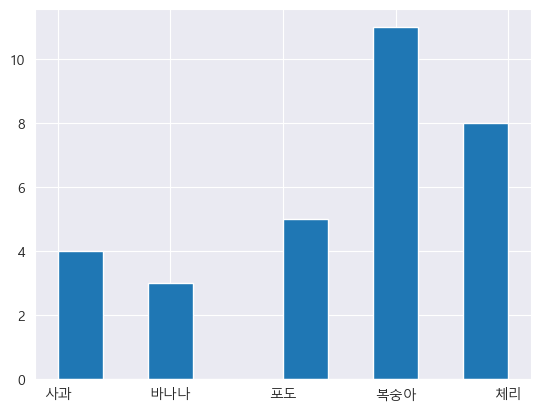

In [160]:
# lovefruits 파일 읽어오기 - 첫 행이 column이름 / 구분자 : , / 한글 있음
df = pd.read_csv('../data/data/lovefruits.csv', encoding='ms949')
print(df)
# 정보 확인
print(df.info())

# 빈도 수 확인
freq = df['선호과일'].value_counts(sort=False)
print(freq)

# 히스토그램 그리기
plt.hist(df['선호과일'])
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      9 non-null      object
 1   국어      9 non-null      int64 
 2   영어      9 non-null      int64 
 3   수학      9 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 416.0+ bytes
None


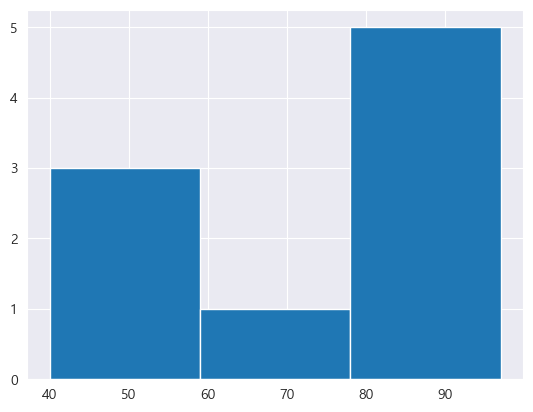

In [161]:
df = pd.read_csv('../data/data/student.csv', encoding='ms949')
print(df.info())

# 점수 같은 데이터는 구간 별로 히스토그램 그리는 것이 좋음
plt.hist(df['수학'], bins=3)
plt.show()

    이름  국어  영어  수학
0  박지영  90  85  55
1  김태함  70  65  80
2  김효섭  92  95  76
3  임경희  76  89  88
4  권혁진  97  87  83
5  하혜진  80  86  97
6  이준원  20  30  40
7  윤정웅  50  52  54
8  주시현  95  70  80


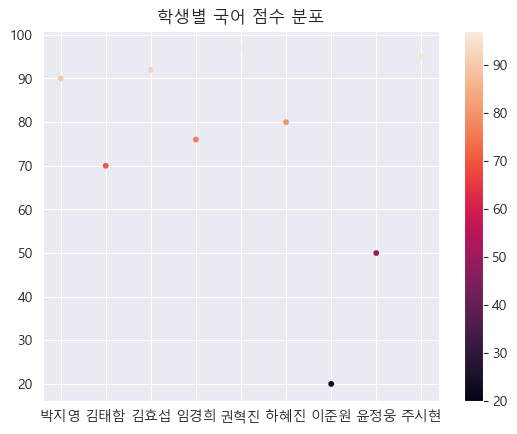

In [162]:
# 산포도

df = pd.read_csv('../data/data/student.csv', encoding='ms949')
print(df)

# 색상 설정
colormap = df['국어']
plt.figure()
# x, y 설정
plt.scatter(x = df['이름'], y = df['국어'], marker='o', s=10, c=colormap)
# colorbar 옆에 그림
plt.colorbar()
# 그래프 제목
plt.title('학생별 국어 점수 분포')

plt.show()

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0    

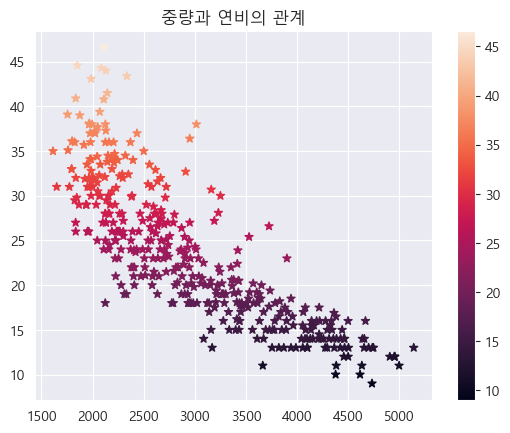

In [163]:
# 여러 개 column 이용한 산포도
df = pd.read_csv('../data/data/noheader_auto-mpg.csv', header=None)
df.columns = ['mpg', 'cylinders', 'displacement','horsepower','weight','acceleration', 'model year', 'origin', 'name']
print(df.head())

# 존재하지 않는 column 쓰면 column 추가 됨
df['cylinders_size'] = df['cylinders']/df.cylinders.max() * 300
print(df.head())

colormap = df['mpg']
plt.scatter(x=df['weight'], y=df['mpg'], marker='*', c=colormap)
plt.colorbar()
plt.title("중량과 연비의 관계")
plt.show()

<class 'pandas.core.series.Series'>


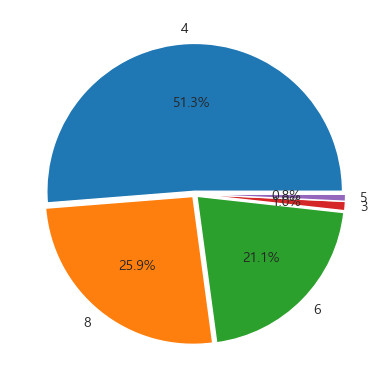

In [164]:
count = df['cylinders'].value_counts()
print(type(count))
explode=(0.02,0.02,0.02,0.02,0.02)
plt.pie(count, labels=count.index, autopct='%1.1f%%', explode=explode)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      9 non-null      object
 1   국어      9 non-null      int64 
 2   영어      9 non-null      int64 
 3   수학      9 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 416.0+ bytes
None


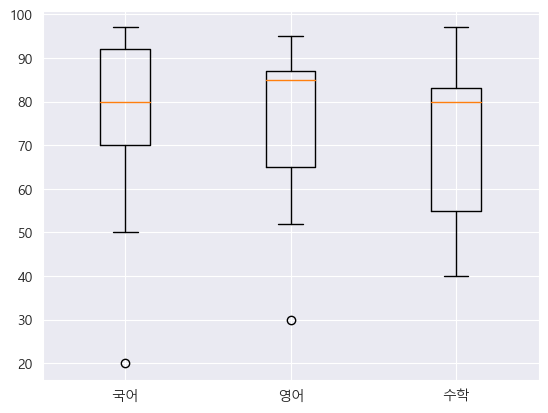

In [165]:
df = pd.read_csv('../data/data/student.csv', encoding='ms949')
print(df.info())

plt.boxplot([df['국어'], df['영어'], df['수학']], labels=('국어', '영어', '수학'))
plt.show()

In [166]:
# seaborn

In [167]:
import seaborn as sns

In [168]:
tips = sns.load_dataset('tips')
print(tips.head())
print()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4



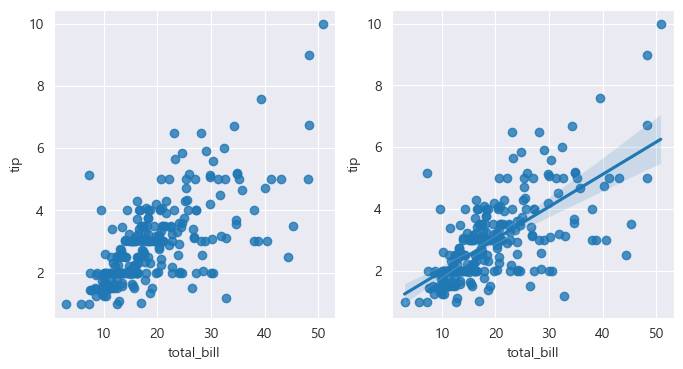

In [169]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x="total_bill", y="tip", data=tips, fit_reg=False, ax=ax1)
sns.regplot(x="total_bill", y="tip", data=tips, fit_reg=True, ax=ax2)
sns.set_style("darkgrid")
plt.show()

In [170]:
!pip install folium

In [9]:
import folium

In [172]:
m = folium.Map(location = [37.559733, 126.936916], zoom_start=15)

folium.Marker(location=[37.559041, 126.936747], popup="대학약국", icon=folium.Icon(icon='cloud')).add_to(m)
folium.RegularPolygonMarker([37.557723, 126.937332], popup="형제갈비", fill_color='#769d96', number_of_sides=12, radius=10).add_to(m)
# html 파일로 저장
m.save("map.html")

m

In [173]:
df = pd.read_excel('../data/data/서울지역_대학교_위치.xlsx')
print(df.head())
print(df.info())

m = folium.Map(location=[37.55,126.98], zoom_start=12)

# DataFrame의 데이터 순회
for name, lat, lng in zip(df['Unnamed: 0'], df['위도'], df['경도']):
    folium.CircleMarker([lat, lng],
                        radius=10,
                        color='blue',
                        fill=True,
                        fill_color='coral',
                        fill_opacity=0.7,
                        popup=name).add_to(m)
    print(name, lat, lng)

m

     Unnamed: 0         위도          경도
0  KAIST 서울캠퍼스   37.592573  127.046737
1         KC대학교  37.548345  126.854797
2  가톨릭대학교(성신교정)  37.585922  127.004328
3  가톨릭대학교(성의교정)  37.499623  127.006065
4      감리교신학대학교  37.567645  126.961610
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  47 non-null     object 
 1   위도          47 non-null     float64
 2   경도          47 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB
None
KAIST 서울캠퍼스  37.592573 127.046737
KC대학교 37.5483449 126.8547974
가톨릭대학교(성신교정) 37.5859218 127.0043275
가톨릭대학교(성의교정) 37.4996227 127.0060653
감리교신학대학교 37.5676455 126.96161
건국대학교 37.5407625 127.0793428
경기대학교 서울캠퍼스  37.30048499999999 127.035833
경희대학교 서울캠퍼스  37.5961951 127.052544
고려대학교 33.8477818 -117.9777482
광운대학교 37.6194965 127.0596958
국민대학교 37.6096409 126.997697
덕성여자대학교 37.6511988 127.0161604
동국대학교 37.5574

In [1]:
# 경기도 인구 단계 구분도
# json 파싱을 위한 패키지
import json

In [6]:
# 경기도 인구 데이터 가져오기
df = pd.read_excel('../data/data/경기도인구데이터.xlsx')
print(df.head())

# column 이름 숫자에서 문자열로 변환
df.columns = df.columns.map(str)
df.index = df['구분']
print(df.head())

       구분    2007    2008    2009    2010    2011    2012    2013    2014  \
0  수원시장안구  287474  285803  290798  293692  290999  291757  300908  301196   
1  수원시권선구  310553  308177  304097  306783  321176  332633  331773  339835   
2  수원시팔달구  216945  213235  219833  216503  209772  206794  204805  203479   
3  수원시영통구  252730  260210  258421  260557  266542  289074  310671  329718   
4  성남시수정구  256744  248452  242161  241070  236123  233997  228167  223539   

     2015    2016    2017  
0  299016  296479  293828  
1  351053  358393  365653  
2  199180  198515  193311  
3  335375  340654  349836  
4  219531  232841  236932  
            구분    2007    2008    2009    2010    2011    2012    2013  \
구분                                                                       
수원시장안구  수원시장안구  287474  285803  290798  293692  290999  291757  300908   
수원시권선구  수원시권선구  310553  308177  304097  306783  321176  332633  331773   
수원시팔달구  수원시팔달구  216945  213235  219833  216503  209772  206794  204805   

In [7]:
# 행정구역 경계와 관련된 json 파일 열어서 parsing
# utf-8-sig : 파일 형식에 상관없이 인코딩해서 디코딩을 편리하게 해주는 인코딩 방식
try:
    geo_data = json.load(open('../data/data/경기도행정구역경계.json', encoding='utf-8'))

except:
    geo_data = json.load(open('../data/data/경기도행정구역경계.json', encoding='utf-8-sig'))


print(geo_data)  

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'code': 31380, 'name': '양평군', 'name_eng': 'Yangpyeong-gun', 'base_year': 2013}, 'geometry': {'type': 'Polygon', 'coordinates': [[[127.56113535909492, 37.6256560539258], [127.57290963929243, 37.61087369350498], [127.56366973908277, 37.5842624297699], [127.52226606559191, 37.5828628697518], [127.50048767007603, 37.569036373178626], [127.47687473909174, 37.574448241913856], [127.47565866803647, 37.60512112601634], [127.44699730711024, 37.64497584741164], [127.4272349102434, 37.66284420898682], [127.40156700708162, 37.64806970784708], [127.3732642199939, 37.6453987554284], [127.3542931884407, 37.6250006376975], [127.34360057873045, 37.588997440929354], [127.31002843450217, 37.53523876142835], [127.30923294884336, 37.5135706079458], [127.32809611134748, 37.53133849534739], [127.3663244453597, 37.52716845880826], [127.38286320755414, 37.50147517965334], [127.39046783039153, 37.47413422098595], [127.37490698722792, 

In [10]:
# 지도 생성
g_map = folium.Map(location=[37.5502, 126.982], zoom_start=8.7, tiles='Stamen Terrain')

# 단계 구분도 만들기
folium.Choropleth(geo_data=geo_data, data=df['2015'],
                 columns=[df.index, df['2015']],
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                 threshold_scale=[10000, 100000, 300000,500000,700000],
                 key_on='feature.properties.name').add_to(g_map)
g_map

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39016 entries, 0 to 39015
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    39016 non-null  object 
 1   avg     38260 non-null  float64
 2   min     38259 non-null  float64
 3   max     38258 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.2+ MB
None


<Axes: >

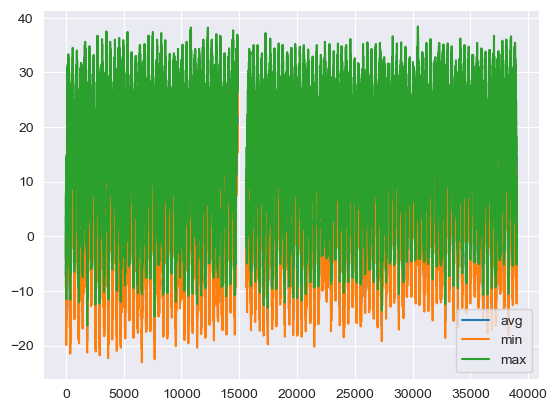

In [182]:
df = pd.read_csv('../data/data/seoul.csv', encoding='ms949')
print(df.info())
df.plot()

<Axes: xlabel='date'>

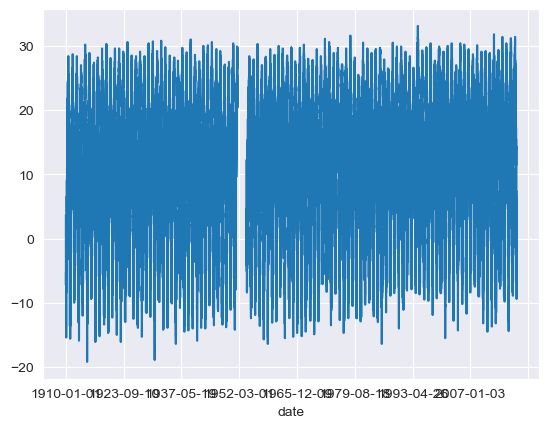

In [183]:
df.index = df['date']
df['avg'].plot()

In [17]:
df = pd.DataFrame([['안녕','안녕?','안녕!', '안녕'],
               ['아침', '점심', '저녁','아침']])
print(df)
df = df.T
print(df)

print(df.duplicated())  # 중복 확인

df.drop_duplicates(inplace=True)
print(df.duplicated())
print(df)

    0    1    2   3
0  안녕  안녕?  안녕!  안녕
1  아침   점심   저녁  아침
     0   1
0   안녕  아침
1  안녕?  점심
2  안녕!  저녁
3   안녕  아침
0    False
1    False
2    False
3     True
dtype: bool
0    False
1    False
2    False
dtype: bool
     0   1
0   안녕  아침
1  안녕?  점심
2  안녕!  저녁


In [20]:
def function(data):
    return data+'...'

# Series에 함수 적용
print(df[0].apply(lambda data : data +'.-.'))  # Series는 셀 단위 적용
print(df.apply(function))  # DataFrame은 행, 열 단위 적용, 기본은 열 단위 적용

# lambda로 바꿔보기  # applycode2023 

0     안녕.-.
1    안녕?.-.
2    안녕!.-.
Name: 0, dtype: object
        0      1
0   안녕...  아침...
1  안녕?...  점심...
2  안녕!...  저녁...


In [21]:
import seaborn as sns

In [28]:
titanic = sns.load_dataset('titanic')
print(titanic.head())

df = titanic[['age', 'fare']]
print(df.head())

def min_max(data) :
    return data.max()- data.min()

# 열단위로 함수 적용
result = df.apply(min_max, axis=0)
print(result)


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500
age      79.5800
fare    512.3292
dtype: float64


In [40]:
print(titanic.head())
df = titanic[['age', 'fare']]
print(type(df))

# 하나의 데이터로 null 여부 판단해주는 함수
# 셀 단위로 적용해서 DataFrame 반환
print(df.pipe(lambda tatanic : titanic.isnull()))

def missing_value(x):
    return x.isnull()

print(df.pipe(lambda titanic: missing_value(titanic).sum()))

def missing_count(x):
    return missing_value(titanic).sum()

print(df.pipe(lambda titanic: missing_count(titanic).sum()))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
     survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  Fals

In [54]:
df = pd.read_excel('../data/data/주가데이터.xlsx')
print(df.info())
print(df.head())
# dates = df['연월일'].str.split('-')  # 자료형이 datetime이면 split 사용 불가

# 데이터 타입 변경
# astype 함수로 변경
# map 함수에 자료형 변경할 수 있는 함수 대입
df['연월일'] = df['연월일'].astype('str')
dates = df['연월일'].str.split('-')
print(dates.head())
df['연'] = dates.str.get(0)
df['월'] = dates.str.get(1)
df['일'] = dates.str.get(2)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연월일     20 non-null     datetime64[ns]
 1   당일종가    20 non-null     int64         
 2   전일종가    20 non-null     int64         
 3   시가      20 non-null     int64         
 4   고가      20 non-null     int64         
 5   저가      20 non-null     int64         
 6   거래량     20 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 1.2 KB
None
         연월일   당일종가  전일종가     시가     고가     저가     거래량
0 2018-07-02  10100   600  10850  10900  10000  137977
1 2018-06-29  10700   300  10550  10900   9990  170253
2 2018-06-28  10400   500  10900  10950  10150  155769
3 2018-06-27  10900   100  10800  11050  10500  133548
4 2018-06-26  10800   350  10900  11000  10700   63039
0    [2018, 07, 02]
1    [2018, 06, 29]
2    [2018, 06, 28]
3    [2018, 06, 27]
4    [2018, 06, 26]
Name: 연월일,

In [62]:
df1 = pd.DataFrame({
    'a':['a0','a1','a2','a3'],
    'b':['b0','b1','b2','b3'],
    'c':['c0','c1','c2','c3']
}, index = [1,2,3,4])

df2 = pd.DataFrame({
    'a':['a1','a2','a3','a4'],
    'b':['b5','b1','b2','b4'],
    'd':['d3','d4','d2','d6']
}, index = [2,3,4,5])

print(df1)
print(df2)

print(pd.concat([df1, df2]))  # 기본적으로 행 방향으로 결합
# 동일한 column이면 값이 있고 한 쪽에만 있는 column은 NaN

print(pd.concat([df1, df2], axis=1))  # 동일한 index끼리 열 방향으로 결합

print(pd.concat([df1, df2], axis=1, join='inner'))  # 양쪽 모두에 존재하는 데이터만 결합 - Inner Join

    a   b   c
1  a0  b0  c0
2  a1  b1  c1
3  a2  b2  c2
4  a3  b3  c3
    a   b   d
2  a1  b5  d3
3  a2  b1  d4
4  a3  b2  d2
5  a4  b4  d6
    a   b    c    d
1  a0  b0   c0  NaN
2  a1  b1   c1  NaN
3  a2  b2   c2  NaN
4  a3  b3   c3  NaN
2  a1  b5  NaN   d3
3  a2  b1  NaN   d4
4  a3  b2  NaN   d2
5  a4  b4  NaN   d6
     a    b    c    a    b    d
1   a0   b0   c0  NaN  NaN  NaN
2   a1   b1   c1   a1   b5   d3
3   a2   b2   c2   a2   b1   d4
4   a3   b3   c3   a3   b2   d2
5  NaN  NaN  NaN   a4   b4   d6
    a   b   c   a   b   d
2  a1  b1  c1  a1  b5  d3
3  a2  b2  c2  a2  b1  d4
4  a3  b3  c3  a3  b2  d2


In [63]:
print(df1.append(df2))

    a   b    c    d
1  a0  b0   c0  NaN
2  a1  b1   c1  NaN
3  a2  b2   c2  NaN
4  a3  b3   c3  NaN
2  a1  b5  NaN   d3
3  a2  b1  NaN   d4
4  a3  b2  NaN   d2
5  a4  b4  NaN   d6


C:\Users\USER\AppData\Local\Temp\ipykernel_22768\1388991793.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(df1.append(df2))


In [68]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan])
b = pd.Series(np.arange(len(a), dtype=np.float64))
print(a)
print(b)

# a 에서 NaN이면 b 데이터로 채우기
# numpy 1차원 배열은 행 방향으로 출력
# r = np.where(조건, 데이터1, 데이터2) - 조건 True인 경우 데이터 1, True 아니면 데이터2
r = np.where(pd.isnull(a), b, a)
print(r)
print(pd.Series(r))
print(a.combine_first(b))

0    NaN
1    2.5
2    NaN
3    3.5
4    4.5
5    NaN
dtype: float64
0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
dtype: float64
[0.  2.5 2.  3.5 4.5 5. ]
0    0.0
1    2.5
2    2.0
3    3.5
4    4.5
5    5.0
dtype: float64
0    0.0
1    2.5
2    2.0
3    3.5
4    4.5
5    5.0
dtype: float64


In [72]:
price = pd.read_excel('../data/data/stock price.xlsx')
valuation = pd.read_excel('../data/data/stock valuation.xlsx')

print(price)
print(valuation)
inner_join = pd.merge(price, valuation)
print(inner_join)

       id stock_name          value   price
0  128940       한미약품   59385.666667  421000
1  130960     CJ E&M   58540.666667   98900
2  138250      엔에스쇼핑   14558.666667   13200
3  139480        이마트  239230.833333  254500
4  142280     녹십자엠에스     468.833333   10200
5  145990        삼양사   82750.000000   82000
6  185750        종근당   40293.666667  100500
7  192400      쿠쿠홀딩스  179204.666667  177500
8  199800         툴젠   -2514.333333  115400
9  204210     모두투어리츠    3093.333333    3475
       id       name           eps     bps        per       pbr
0  130960     CJ E&M   6301.333333   54068  15.695091  1.829178
1  136480         하림    274.166667    3551  11.489362  0.887074
2  138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
3  139480        이마트  18268.166667  295780  13.931338  0.860437
4  145990        삼양사   5741.000000  108090  14.283226  0.758627
5  161390      한국타이어   5648.500000   51341   7.453306  0.820007
6  181710  NHN엔터테인먼트   2110.166667   78434  30.755864  0.827447
7  1

In [78]:
outer_join = pd.merge(price, valuation, how='outer')
outer_join.index = outer_join['id']
print(outer_join)

            id stock_name          value     price       name           eps  \
id                                                                            
128940  128940       한미약품   59385.666667  421000.0        NaN           NaN   
130960  130960     CJ E&M   58540.666667   98900.0     CJ E&M   6301.333333   
138250  138250      엔에스쇼핑   14558.666667   13200.0        NaN           NaN   
139480  139480        이마트  239230.833333  254500.0        이마트  18268.166667   
142280  142280     녹십자엠에스     468.833333   10200.0        NaN           NaN   
145990  145990        삼양사   82750.000000   82000.0        삼양사   5741.000000   
185750  185750        종근당   40293.666667  100500.0        종근당   3990.333333   
192400  192400      쿠쿠홀딩스  179204.666667  177500.0        NaN           NaN   
199800  199800         툴젠   -2514.333333  115400.0        NaN           NaN   
204210  204210     모두투어리츠    3093.333333    3475.0     모두투어리츠     85.166667   
136480  136480        NaN            NaN       NaN  

In [86]:
price = pd.read_excel('../data/data/stock price.xlsx', index_col='id')
valuation = pd.read_excel('../data/data/stock valuation.xlsx', index_col='id')

print(price)
print(valuation)
print()
print()
print()
print()
print()
print(price.join(valuation))  # instance로 method 호출 : bound 호출
print(pd.DataFrame.join(price, valuation))  # class로 instance method 호출 : unbound 호출

       stock_name          value   price
id                                      
128940       한미약품   59385.666667  421000
130960     CJ E&M   58540.666667   98900
138250      엔에스쇼핑   14558.666667   13200
139480        이마트  239230.833333  254500
142280     녹십자엠에스     468.833333   10200
145990        삼양사   82750.000000   82000
185750        종근당   40293.666667  100500
192400      쿠쿠홀딩스  179204.666667  177500
199800         툴젠   -2514.333333  115400
204210     모두투어리츠    3093.333333    3475
             name           eps     bps        per       pbr
id                                                          
130960     CJ E&M   6301.333333   54068  15.695091  1.829178
136480         하림    274.166667    3551  11.489362  0.887074
138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
139480        이마트  18268.166667  295780  13.931338  0.860437
145990        삼양사   5741.000000  108090  14.283226  0.758627
161390      한국타이어   5648.500000   51341   7.453306  0.820007
181710  NHN엔터테인먼트   